In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes tus datos en un archivo CSV
df = pd.read_csv("Titanic-Dataset.csv")

# Paso 1: Identificando valores ausentes

# Pregunta: Usa .isnull().sum() para hacer un recuento de los valores faltantes. ¿Qué tres columnas tienen nulos?

print(df.isnull().sum())

# Las 3 columnas con valores faltantes son Age (177), Cabin (687) y Embarked (2)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [2]:
# Acción (Edad): La columna `Age` es numérica y crucial para el análisis. Imputa los valores faltantes. 

# Rellenar nulos en 'Age' con la mediana de la columna
mediana_age = df['Age'].median()
df['Age'].fillna(mediana_age, inplace=True)

C:\Users\aleja\AppData\Local\Temp\ipykernel_1136\518469973.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mediana_age, inplace=True)


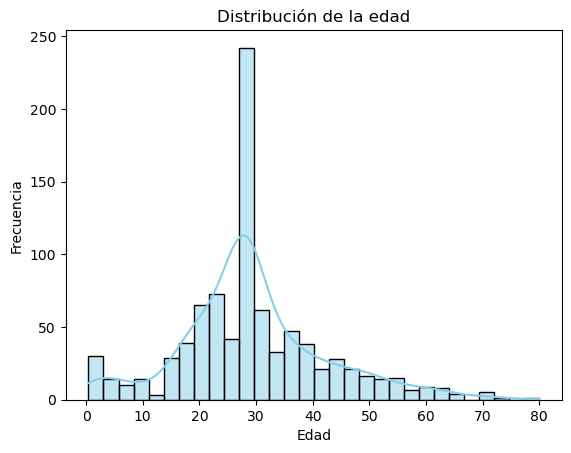

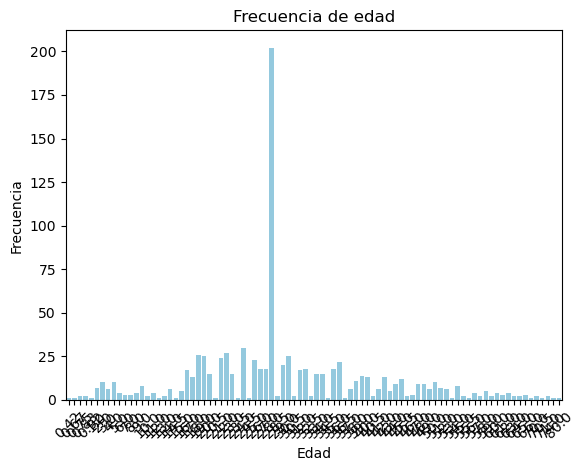

In [3]:
# ¿Usarías la media o la mediana? Justifica tu elección y aplícala. (Pista: Visualiza primero la distribución de `Age` para ver si hay asimetría).

# Crear un histograma de la edad
sns.histplot(df["Age"], kde=True, color="skyblue")
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Contar cuántas edades hay
age_counts = df["Age"].value_counts()

# Crear el gráfico de barras
sns.barplot(x=age_counts.index, y=age_counts.values, color="skyblue")

plt.title("Frecuencia de edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)  # Rotar etiquetas si son muchas
plt.show()

# Creo que sería mucho mejor la mediana, ya que la distribución de edad esta en 30, y están la mayoria de personas, casi 240/250
# por lo que si hacemos la media, ese valor tan alto va a alterar el resultado de una media normal, mientras
# que si utilizamos una mediana, no ocurrirá este problema, ya que la mediana no se verá afectada por ese dato

In [4]:
# Acción (Embarque): La columna `Embarked` es categórica. Tiene muy pocos nulos. Imputa estos valores con la moda (el puerto de embarque más común).

print(df['Embarked'].isnull().sum())

moda = df['Embarked'].mode()[0]
df['Embarked'].fillna(moda, inplace=True)

print(df['Embarked'].isnull().sum())


2
0


C:\Users\aleja\AppData\Local\Temp\ipykernel_1136\4152708405.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(moda, inplace=True)


In [5]:
# Acción (Cabina): La columna `Cabin` tiene una gran cantidad de valores nulos. Discute por qué imputar no sería una buena idea en este caso.

# Al haber tantos valores faltantes, no tenemos suficiente información para estimar los datos que faltan de forma confiable.
# Imputar significaría “inventar” información sin una base sólida, lo que podría distorsionar el análisis y inventarse información sin fundamentos.
# En este caso sería mejor directamente eliminar los registros

# elimina toda la columna Cabin (mejor opción si tiene muchos nulos).
df.drop(columns=['Cabin'], inplace=True)

In [6]:
# Comprobación: Verifica que `Age` y `Embarked` ya no tienen nulos y que `Cabin` ya no existe en el DataFrame.

print("Nulos en Age:", df['Age'].isnull().sum())
print("Nulos en Embarked:", df['Embarked'].isnull().sum())
print("\n¿Cabin existe en el DataFrame?:", 'Cabin' in df.columns)


Nulos en Age: 0
Nulos en Embarked: 0

¿Cabin existe en el DataFrame?: False


In [7]:
# Paso 2: Simplificación del Dataset
# Pregunta: Columnas como `PassengerId`, `Name`, y `Ticket` son identificadores únicos o tienen demasiada variabilidad para ser útiles en un análisis agregado inicial. 
# ¿Aportan información general sobre los patrones de supervivencia?

# No, ninguno de esos identificados contienen información importante de supervivencia, quizás el nombre de cada pasajero, pero siendo texto tampoco es un identificador muy válido,
# pero el ticket que tienen o su id supongo que no


In [8]:
# Acción: Para simplificar tu análisis futuro, elimina estas tres columnas.

df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [9]:
# Paso 3: Verificación Final

# Pregunta: ¿Quedan filas duplicadas en el dataset limpio?

num_duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

# Acción: Si las hay, elimínalas.

# Eliminar duplicados
df_sin_duplicados = df.drop_duplicates()

# Comprobación: Usa .info() y .isnull().sum() por última vez para asegurarte de que tu DataFrame está limpio, sin nulos, sin columnas innecesarias 
# y con los tipos de datos correctos.

df.info()
print(df.isnull().sum())

# Hay alguna columna que podría tener algún tipo distinto, pero lo mejor sería buscar eficiencia en datos necesarios usando el category

df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


Número de filas duplicadas: 116
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [1]:
import pandas as pd

# Leer el CSV con separador coma
df = pd.read_csv("U4__MostStreamedSpotifySongs2024.csv", encoding="latin1")

# Columnas numéricas que quieres convertir
cols_numericas = [
    "Spotify Streams",
    "Spotify Playlist Count",
    "Spotify Playlist Reach",
    "Spotify Popularity",
    "YouTube Views",
    "YouTube Likes",
    "TikTok Posts",
    "TikTok Likes",
    "TikTok Views"
]

# Limpiar comas internas y convertir a float
for col in cols_numericas:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(",", "", regex=False).astype(float)

# Guardar en CSV listo para Orange
# Aquí sí podemos usar separador punto y coma, Orange lo acepta
df.to_csv("U4_MostStreamedSpotifySongs2024_clean.csv", index=False, sep=';', decimal='.', encoding='latin1')
